# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("Profissao- Cientista de Dados_M10_support material.csv")
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [58]:
colunas_a_remover = ["Unnamed: 0", "posse_de_veiculo", "index", "posse_de_imovel", "qtd_filhos", "idade", "tempo_emprego", "qt_pessoas_residencia", "mau", "renda"]

df_ = df.drop(colunas_a_remover, axis=1)
df_

,data_ref,sexo,tipo_renda,educacao,estado_civil,tipo_residencia
0,2015-01-01,F,Assalariado,Secundário,Casado,Casa
1,2015-01-01,M,Empresário,Secundário,Casado,Casa
2,2015-01-01,M,Assalariado,Superior completo,Casado,Casa
3,2015-01-01,F,Empresário,Secundário,Casado,Casa
4,2015-01-01,M,Assalariado,Secundário,Casado,Casa
...,...,...,...,...,...,...
14995,2016-03-01,M,Assalariado,Secundário,Casado,Casa
14996,2016-03-01,M,Servidor público,Superior completo,Casado,Estúdio
14997,2016-03-01,F,Assalariado,Secundário,Casado,Casa
14998,2016-03-01,F,Servidor público,Superior completo,Casado,Casa


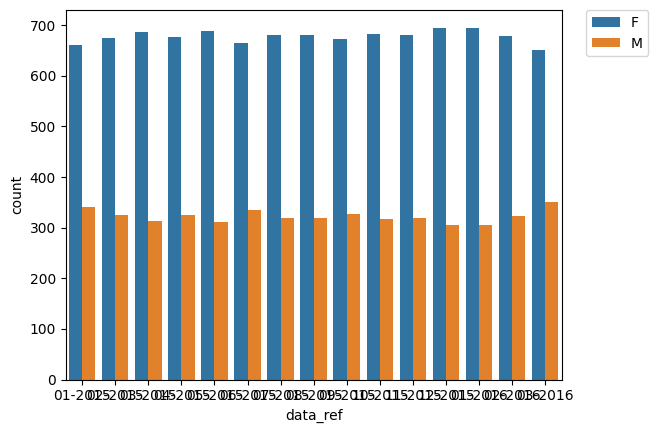

In [59]:
df_['data_ref'] = pd.to_datetime(df_['data_ref'], format='%Y-%m-%d')


ax = sns.countplot(x='data_ref',  hue = 'sexo', data=df_)

tick_labs = df_['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(df_['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Não temos alterações importantes ao longo do tempo que merecem investigação.

2) Para cada variável quantitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

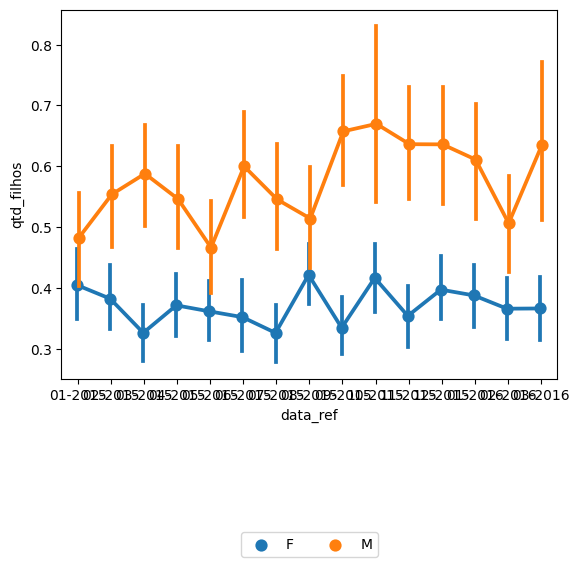

In [75]:
df['data_ref'] = pd.to_datetime(df['data_ref'], format='%Y-%m-%d')


ax = sns.pointplot(x="data_ref", y="qtd_filhos", hue = 'sexo',
                   data=df, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

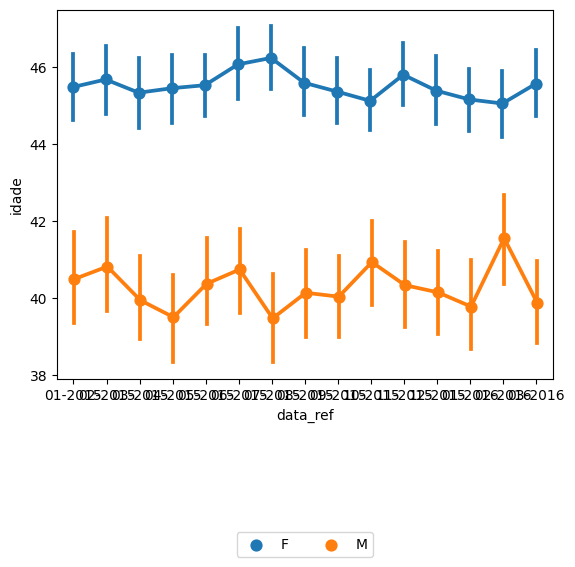

In [76]:
df['data_ref'] = pd.to_datetime(df['data_ref'], format='%Y-%m-%d')


ax = sns.pointplot(x="data_ref", y="idade", hue = 'sexo',
                   data=df, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

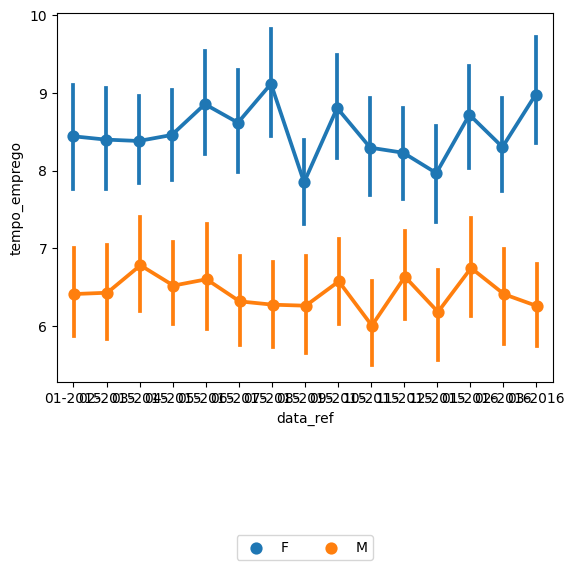

In [77]:
df['data_ref'] = pd.to_datetime(df['data_ref'], format='%Y-%m-%d')


ax = sns.pointplot(x="data_ref", y="tempo_emprego", hue = 'sexo',
                   data=df, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

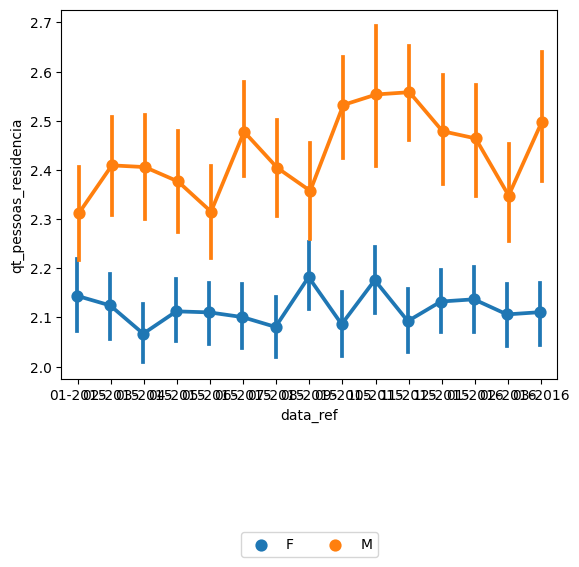

In [78]:
df['data_ref'] = pd.to_datetime(df['data_ref'], format='%Y-%m-%d')


ax = sns.pointplot(x="data_ref", y="qt_pessoas_residencia", hue = 'sexo',
                   data=df, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

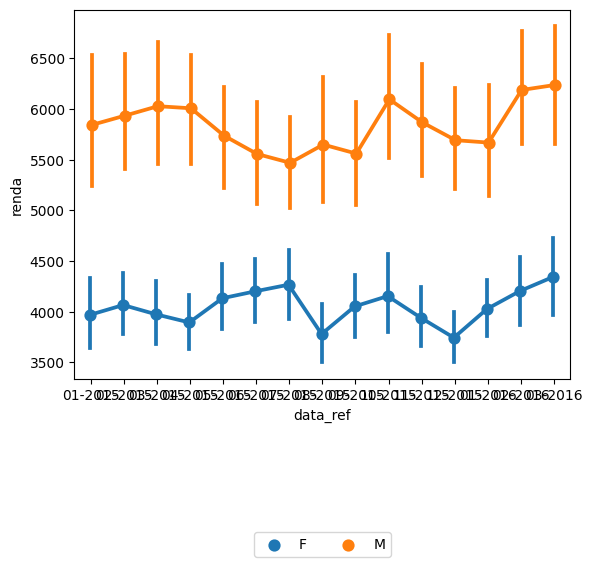

In [79]:
df['data_ref'] = pd.to_datetime(df['data_ref'], format='%Y-%m-%d')


ax = sns.pointplot(x="data_ref", y="renda", hue = 'sexo',
                   data=df, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

Pelos perfis de médias observados, nóta-se que os perfis de médias qtde_pessoas_residÊncia e qtde_filhos teem grande variabilidade. Sendo assim, evitaria de utilizar estas variáveis na análise.